# Time series of Rx1day over IPCC region
1. Time series of indices over IPCC AR6 region (The whole temporal coverage of dataset)
2. Data masked by REGEN_ALL (grid points with 80% data availability over 1950-2016) integrated with land_sea_mask from IPCC 

In [2]:
# Import modules
%matplotlib inline
%run /g/data/w40/pn3424/2024/Lisa/Python/Code/Master_functions_Lisa.ipynb
import xarray as xr
import pymannkendall as mk
import fnmatch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


Shape of p-values array: (10, 10)


## Define Spatiotemporal boundaries

In [3]:
# Define region of interest (lat and lon boundaries for all of big region of interest e.g. Monsoon Asia, Australia, Africa... )
lat_slice = slice(-25,55)
lon_slice = slice(60,150)

# Define temporal scale for SPI variable (1 for 3-months, 2 for 6-months, 3 for 12-months); use "None" if not using the SPI variable
iscale = None

# Define season as a list of month numbers. If not wanting a seasonal breakdown, use None.
# Suggestions: Wet 6-month: [10,11,12,1,2,3]; Dry 6-month: [4,5,6,7,8,9]; Wet 3-month: [12,1,2]; Dry 3-month: [6,7,8]
season = None
season_name = 'Annual'

# Define mask for regions

mask_ds = xr.open_dataset('/g/data/w40/pn3424/2024/Lisa/mask/land_sea_mask_combined_1degree.nc')

land_mask = mask_ds.sftlf.sel(lat=lat_slice, lon=lon_slice)


## Define Keywords for Data/Data paths

In [4]:
# Define keywords to be used with f-strings to build the path to datasets
variable = 'rx1day'
temporal_resolution='yr'


# Define paths to data
global_path = '/g/data/w40/pn3424/2024/Lisa/data'
regional_path='/g/data/w40/pn3424/2024/Lisa/climpact'

global_data_path = global_path + f"/{variable}/{temporal_resolution}/"
regional_data_path = regional_path + f"/{variable}_ANN_1degree_APHRODITE_MA_1951-2015.nc"


## Get Pandas Dataframe with complete list of model dataset file paths

In [5]:
data_paths = get_data_files(global_data_path)
pd.set_option('display.max_colwidth', None)
data_paths

,dataset,dataset_path
0,COSCH,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_COSCH_2000-2021.nc
1,None,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/EAU
2,TAPEER_v1.5,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_TAPEER_v1.5_2011-2021.nc
3,3B42RT_v7.0,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_3B42RT_v7.0_2001-2019.nc
4,None,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_REGEN_LONG_V1-2019_1950-2016.nc
5,ERA5,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_ERA5_1979-2022.nc
6,MERRA1,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_MERRA1_1979-2015.nc
7,IMERG_V06_FC,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_IMERG_V06_FC_2001-2021.nc
8,TAMSAT_v3,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_TAMSAT_v3_1983-2022.nc
9,REGEN_ALL_2019,/g/data/w40/pn3424/2024/Lisa/data/rx1day/yr/rx1day_yr_REGEN_ALL_2019_1950-2016.nc


### Defining subset

In [6]:
insitu_names = ["CPC_v1.0","GPCC_FDD_v2022","REGEN_ALL_2019"]
satellite_names=["CHIRPS_v2.0","CMORPH_v1.0_CRT","GIRAFE","GPCP_V3.2", "GSMAP-NRT-gauges-v8.0","IMERG-v07B-FC","PERSIANN_v1_r1"]
reanalysis_names=["CFSR","ERA5","JRA-55","MERRA2"]
regional_names='APHRODITE'

In [7]:
insitu_paths_subset = get_data_files_subset(data_paths, insitu_names).sort_values('data_name')
satellite_paths_subset = get_data_files_subset(data_paths, satellite_names).sort_values('data_name')
reanalysis_paths_subset = get_data_files_subset(data_paths, reanalysis_names).sort_values('data_name')

## IPCC regional mask

In [8]:
import regionmask
ipcc_mask_ds=xr.open_dataset("/g/data/w40/pn3424/2024/Lisa/mask/land_sea_mask_combined_1degree.nc")
ipcc_mask=regionmask.defined_regions.ar6.land.mask(ipcc_mask_ds)

In [9]:
##define IPCC Region
ipcc_subregions = {
    "SEA": 38,
    "EAS": 35,
    "ECA": 33, 
    "TIB": 34, 
    "SAS": 37
}

#region = 42
region_name = 'ECA'
region_name_a ='(d) ECA'

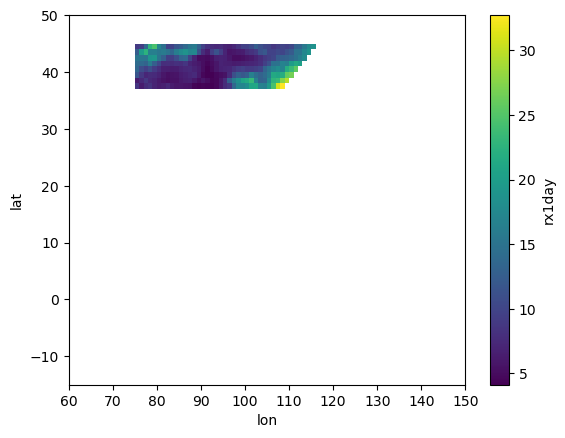

In [10]:
##create the reference domain from the climatology over 2001-2015
time_slice = slice("2001", "2015")
clim_regional = get_climatology(regional_data_path,variable, time_slice, lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, ipcc_subregions[region_name])
clim_regional.plot()
##number of grid points have data
b=clim_regional.count()

In [11]:
##extract unit from regional dataset
ds1=xr.open_dataset(regional_data_path)
unit=ds1.rx1day.attrs["units"]

### Get Weighted Spatial Average at each Year for the time series

### regional data

In [12]:
time_slice = slice("1951", "2022")

In [13]:
##mask nan values for the year when spatial coverage less than 80% of the whole spatial domain
regional_spatial=get_map(regional_data_path, variable, time_slice,lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, ipcc_subregions[region_name])
regional_spatial_mask=[]
for i in range(len(regional_spatial.time)): 
    region_xr=regional_spatial.isel(time=i)
    a=region_xr.count()
    if ((a/b)>=0.8): 
        region_xr_masked=region_xr
    else: 
        region_xr_masked=region_xr.where(region_xr.values == np.nan)
    regional_spatial_mask.append(region_xr_masked)

In [14]:
regional_masked=[*regional_spatial_mask]
regional_map_masked=xr.concat(regional_masked,dim=('time'))


In [15]:
##calculated weighted data
weights = np.cos(np.deg2rad(regional_map_masked.lat))
weights.name = "weights"
regional_weighted=regional_map_masked.weighted(weights)

regional_ts=regional_weighted.mean(dim=('lon','lat'))
regional_ts

<xarray.DataArray 'rx1day' (time: 65)>
array([ 9.74151707, 11.46070646,  9.58566704, 10.73175719, 10.24368443,
        9.5078981 ,  8.76434726, 14.18294319, 12.81377673, 11.04854599,
       10.75844525,  9.25701902,  9.82669903, 10.90063704,  8.28406896,
       10.6350424 , 11.38550412, 10.1403212 , 12.43877147, 12.52299677,
       10.83438734, 10.90093314, 10.94726917, 10.96658325,  9.7257655 ,
       10.02371168, 10.89997019, 11.60306495, 12.90065237,  8.41615121,
       12.22203057,  9.95365325,  9.66349117, 10.01049009,  9.93790738,
        9.1691334 , 11.76888329, 11.53425535,  9.25799997, 11.06536222,
       10.23577367, 11.42494981, 11.47872898, 10.36199509, 12.38762498,
       14.26730764,  9.97528526, 11.999625  , 10.94012856,  9.93138298,
        9.62733773, 11.37796461, 10.60198556,  9.75357125,  9.79753353,
        8.99528983, 11.83116967, 12.42097547, 10.85264682, 12.97789966,
       10.45029198, 13.75789045, 11.69889336,  9.2215572 , 12.04345523])
Coordinates:
  * time     (time) datetime64[ns] 1951-07-02 1952-07-01T12:00:00 ... 2015-07-02

### insitu dataset

In [16]:
# Intialize empty array to store model timeseries and slope through Thiel Sen

insitu_ann_ts = []

# Loop through RCM simulations; store in a dictionary
for i, row in insitu_paths_subset.iterrows():
    
    # Get weighted spatial annual average for time series
    insitu_map = get_map(row[1], variable, time_slice,lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, ipcc_subregions[region_name])

    insitu_spatial_mask=[]
    for i in range(len(insitu_map.time)): 
        region_xr=insitu_map.isel(time=i)
        a=region_xr.count()
        if ((a/b)>=0.8): 
            region_xr_masked=region_xr
        else: 
            region_xr_masked=region_xr.where(region_xr.values == np.nan)
        insitu_spatial_mask.append(region_xr_masked)
    
    insitu_masked=[*insitu_spatial_mask]
    insitu_map_masked=xr.concat(insitu_masked,dim=('time'))

    trend_time_slice=slice('2000','2019')

    ##calculated weighted data
    weights = np.cos(np.deg2rad(insitu_map_masked.lat))
    weights.name = "weights"
    
    insitu_weighted=insitu_map_masked.weighted(weights)
    insitu_ts=insitu_weighted.mean(dim=('lon','lat'))
    
    # append time series and slope into array
    insitu_ann_ts.append(insitu_ts)

### satellite dataset


In [17]:
satellite_ann_ts = []

# Loop through RCM simulations; store in a dictionary
for i, row in satellite_paths_subset.iterrows():
    
    # Get weighted spatial annual average for time series
    satellite_map_masked = get_map(row[1], variable, time_slice,lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, ipcc_subregions[region_name])
    satellite_map=satellite_map_masked.where(satellite_map_masked<=200)

    satellite_spatial_mask=[]
    for i in range(len(satellite_map.time)): 
        region_xr=satellite_map.isel(time=i)
        a=region_xr.count()
        if ((a/b)>=0.8): 
            region_xr_masked=region_xr
        else: 
            region_xr_masked=region_xr.where(region_xr.values == np.nan)
        satellite_spatial_mask.append(region_xr_masked)
    
    satellite_masked=[*satellite_spatial_mask]
    satellite_map_masked=xr.concat(satellite_masked,dim=('time'))

    ##calculated weighted data
    weights = np.cos(np.deg2rad(satellite_map_masked.lat))
    weights.name = "weights"
    satellite_weighted=satellite_map_masked.weighted(weights)

    satellite_ts=satellite_weighted.mean(dim=('lon','lat'))

   
    satellite_ann_ts.append(satellite_ts)


## reanalysis data

In [18]:
reanalysis_ann_ts = []

for i, row in reanalysis_paths_subset.iterrows():
    
    # Get weighted spatial annual average for time series
    reanalysis_map = get_map(row[1], variable, time_slice,lat_slice, lon_slice, season, iscale, land_mask, ipcc_mask, ipcc_subregions[region_name])
    
    reanalysis_spatial_mask=[]
    for i in range(len(reanalysis_map.time)): 
        region_xr=reanalysis_map.isel(time=i)
        a=region_xr.count()
        if ((a/b)>=0.8): 
            region_xr_masked=region_xr
        else: 
            region_xr_masked=region_xr.where(region_xr[variable] == np.nan)
        reanalysis_spatial_mask.append(region_xr_masked)
    
    reanalysis_masked=[*reanalysis_spatial_mask]
    reanalysis_map_masked=xr.concat(reanalysis_masked,dim=('time'))


    ##calculated weighted data
    weights = np.cos(np.deg2rad(reanalysis_map_masked.lat))
    weights.name = "weights"
    reanalysis_weighted=reanalysis_map_masked.weighted(weights)

    reanalysis_ts=reanalysis_weighted.mean(dim=('lon','lat'))

    
    reanalysis_ann_ts.append(reanalysis_ts)
    


In [19]:
##combined all dataset in array
time_series=[*insitu_ann_ts, *satellite_ann_ts,*reanalysis_ann_ts, regional_ts]


### Plot time series with mean, median, and spread among dataset 

In [20]:
##create data that have a temporal coverage over 1951-2022 from the dataset
ds1=time_series[0].sel(time=slice('2016','2022'))
ds2=time_series[14]
ds3 = xr.concat([ds2,ds1], dim='time')
ds2_interpolated=ds2.interp(time=ds3.time)
## Create a new time series that has data covering 1951-2022
time_series_interpolated=[]
for i in range (len(time_series)): 
    ds=time_series[i].interp(time=ds3.time)
    time_series_interpolated.append(ds) 


In [21]:
## convert time_series from list to array for calculating mean, median later
d=np.stack(time_series_interpolated, axis=0)
time = ds3.time  # Assuming the time dimension is the same for all arrays
data_vars = {f'series_{i}': (['time'], array) for i, array in enumerate(d)}
ds = xr.Dataset(data_vars, coords={'time': time})

####calculate mean, median, 95th percentile, 5th percentile 
stacked_all = ds.to_array(dim='series')
mean_ds_all = stacked_all.mean(dim='series')
max_ds= stacked_all.max(dim='series')
min_ds= stacked_all.min(dim='series')
####
#percentile_95 = stacked_all.quantile(0.95, dim='series')
#percentile_05 = stacked_all.quantile(0.05, dim='series')
#median = stacked.quantile(0.5, dim='series')

##for in-situ data only 
stacked_insitu= xr.concat([ds['series_0'], ds['series_1'], ds['series_2']], dim='series')
mean_insitu = stacked_insitu.mean(dim='series')
max_insitu= stacked_insitu.max(dim='series')
min_insitu= stacked_insitu.min(dim='series')

##for satellite data only 

stacked_sate= xr.concat([ds['series_3'], ds['series_4'], ds['series_5'],ds['series_6'], ds['series_7'], ds['series_8'], ds['series_9']], dim='series')
mean_sate = stacked_sate.mean(dim='series')
max_sate= stacked_sate.max(dim='series')
min_sate= stacked_sate.min(dim='series')

##for renalysis

stacked_rea= xr.concat([ds['series_10'], ds['series_11'], ds['series_12'],ds['series_13']], dim='series')
mean_rea = stacked_rea.mean(dim='series')
max_rea= stacked_rea.max(dim='series')
min_rea= stacked_rea.min(dim='series')



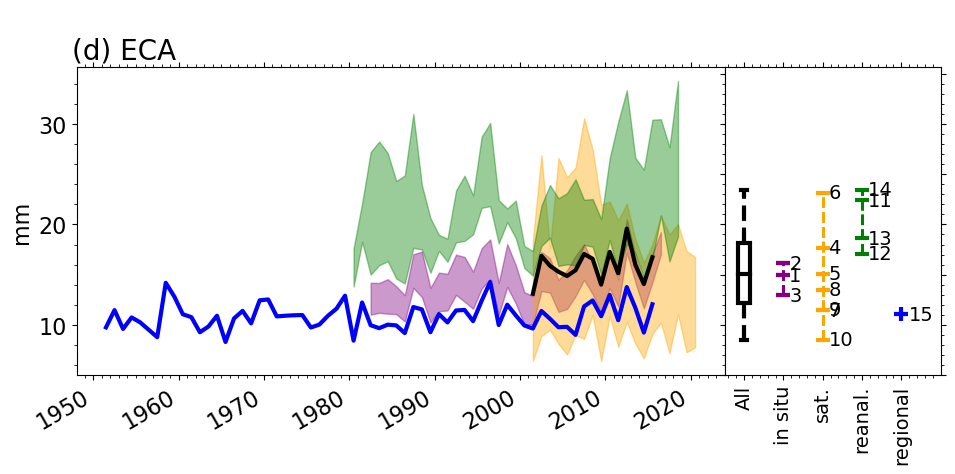

In [22]:
fig = plt.figure(figsize=(12, 4))
    
gs1 = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    
    # Create the subplots
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
    
gs1.update(left = 0, right = 0.72, wspace=0)  # Remove horizontal space between ax1 and ax2
    
gs2 = gridspec.GridSpec(1, 1)
gs2.update(left = 0.825, right = 1)


##plot time series
mean_ds_all[50:65].plot(ax=ax1,color='black', label='mean', lw=3)

ds['series_14'].plot(ax=ax1, color='blue', label='APHRODITE',lw=3)
ax1.fill_between(time[31:66], max_insitu[31:66], min_insitu[31:66], color='purple', alpha=0.4, label='insitu')
ax1.fill_between(time[50:70], max_sate[50:70], min_sate[50:70], color='orange', alpha=0.4, label='satellite')
ax1.fill_between(time[29:68], max_rea[29:68], min_rea[29:68], color='green', alpha=0.4, label='reanalysis')
#ax1.legend(loc='upper left')

ax1.set_ylabel(unit, fontsize=16)
ax1.set_xlabel('', fontsize=16)
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()

ax1.tick_params(axis='x', which='major', labelsize=16)  # Major ticks on x-axis
ax1.tick_params(axis='y', which='major', labelsize=16) 

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax1.xaxis.set_minor_locator(MultipleLocator(365))

import seaborn as sns
data_clim =[]
for i in range(len(time_series)): 
    clim=time_series[i].sel(time=slice('2001', '2015')).mean(dim='time')
    data_clim.append(clim)

all_clim=np.array(data_clim)

PROPS = {'boxprops':{'facecolor':'none', 'edgecolor':'black'},
            'medianprops':{'color':'black'},
            'whiskerprops':{'color':'black', 'linestyle': 'dashed'},
            'capprops':{'color':'black'}
            }
    
sns.boxplot(data=all_clim, ax=ax2,
            color = 'white', width=0.3, whis=1.5, linewidth=3,
            flierprops = dict(marker='_', markerfacecolor = 'black', markersize = 5),showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black","markersize":"0"},**PROPS)
ax2.set_xlim(-0.5, 5)
    
ax2.set_xticks([0., 1., 2., 3., 4.])
ax2.set_xticklabels(['All', 'in situ', 'sat.', 'reanal.', 'regional'], fontsize=14., rotation=90)

ax2.set_ylim(ax1.get_ylim())

#ax2.set_ylim(0,40)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
#ax2.set_yticks([0,15,30])
ax2.set_yticklabels([])

 #========================================
    # Add a vertical line to the right-hand side plot
    # Assuming that the first four time series in time_series_index are the ones for which you want to draw vertical lines
    # add the vertical lines beside the boxplot
    
insitu_clim = all_clim[0:len(insitu_names)]
    
for i, d in enumerate(insitu_clim):
    x_pos = 1 # set the x position for the vertical line
        
        
    ax2.plot([x_pos], [d], marker='_', markersize=10, color='purple', markeredgewidth=3)
    ax2.plot(x_pos, d, marker='_', markersize=10, color='purple',markeredgewidth=3)

    # Add text label near each marker
    #label_offset = 1.  # Adjust this value as needed
    ax2.text(x_pos + 0.15, d, f'{i+1}', fontsize=14, verticalalignment='center')  # Adjust the position and font size as needed
        
    
    y_min = np.nanmin(insitu_clim)
    y_max = np.nanmax(insitu_clim)
    
 
    ax2.vlines(x=x_pos, ymin=y_min, ymax=y_max, linestyle='--', color='purple',linewidth=2)
    #ax2.set_ylim(0,40)

satellite_clim = all_clim[len(insitu_names):(len(insitu_names)+len(satellite_names))]
    
for i, d in enumerate(satellite_clim):
    x_pos = 2 # set the x position for the vertical line
        #ax2.axhline(y=d, linestyle='--', color='gray', linewidth=1)
        
    ax2.plot([x_pos], [d], marker='_', markersize=10, color='orange', markeredgewidth=3)

        # Add text label near each marker
        #label_offset = 1.  # Adjust this value as needed
    ax2.text(x_pos + 0.15, d, f'{i+1+len(insitu_names)}', fontsize=14, verticalalignment='center')
    
    y_min = np.nanmin(satellite_clim)
    y_max = np.nanmax(satellite_clim)
    
    ax2.vlines(x=x_pos, ymin=y_min, ymax=y_max, linestyle='--', color='orange',linewidth=2)
    #ax2.set_ylim(0,40)

reanalysis_clim = all_clim[(len(insitu_names)+len(satellite_names)): (len(all_clim)-1)]
    
for i, d in enumerate(reanalysis_clim):
    x_pos = 3 # set the x position for the vertical line
        
    ax2.plot([x_pos], [d], marker='_', markersize=10, color='green', markeredgewidth=3)

        # Add text label near each marker
        #label_offset = 1.  # Adjust this value as needed
    ax2.text(x_pos + 0.15, d, f'{i+1+len(insitu_names)+len(satellite_names)}', fontsize=14, verticalalignment='center')
    
    y_min = np.nanmin(reanalysis_clim)
    y_max = np.nanmax(reanalysis_clim)
    
    ax2.vlines(x=x_pos, ymin=y_min, ymax=y_max, linestyle='--', color='green',linewidth=2)
    #ax2.set_ylim(0,40)

##regional dataset
regional_clim = all_clim[(len(all_clim)-1)]
    
x_pos = 4 # set the x position for the vertical line
        
ax2.plot([x_pos], regional_clim, marker='+', markersize=10, color='blue', markeredgewidth=3)

ax2.text(x_pos + 0.2, regional_clim, f'{(len(all_clim))}', fontsize=14, verticalalignment='center')

ax2.minorticks_on() 
fig.text(0.04, 0.9, region_name_a, ha='center', wrap=True, fontsize=20)
num_cols = 5
plt.savefig("/g/data/w40/pn3424/2024/Lisa/Fig/Jan2025/" + f"{region_name}_{variable}"+ "_inter_products_spread.png",dpi=300,bbox_inches='tight')